In [3]:
import requests
from bs4 import BeautifulSoup as soup
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import math
import os

#base_dir = '/Users/ThebestKid/Desktop/Hubble/' 
#base_dir = '/Users/computationalphysics/Desktop/LiamKeeley/hubble/'
base_dir = '\\users\\ccesports11\\Desktop\\Liam_Keeley\\hubble-master' #Fricking windows
fits_dir = os.path.join(base_dir, 'fits') #Irrelivant 
image_dir = os.path.join(base_dir, 'images')


#Set up directories
try:
    os.mkdir(fits_dir)
except FileExistsError:
    print('fits_dir exists')
    
try:
    os.mkdir(os.path.join(fits_dir, 'LSF'))
except:
    print('LSF exists')

try:
    os.mkdir(os.path.join(fits_dir, 'r8'))
except:
    print('r8 exists')

try:
    os.mkdir(image_dir)
except FileExistsError:
    print('image_dir exists')

\users\ccesports11\Desktop\Liam_Keeley\hubble-master
fits_dir exists
LSF exists
r8 exists
image_dir exists
['2000_373.fits', '2095_996.fits', '2285_202.fits', '2380_467.fits', '4280_1276.fits', '4375_383.fits', '4470_890.fits', '4565_150.fits', '5040_592.fits', '5135_879.fits', 'LSF', 'r8']
12


In [4]:
import pandas as pd
#NASA exoplanet search data from https://www.kaggle.com/nasa/kepler-exoplanet-search-results/downloads/kepler-exoplanet-search-results.zip/2
exoplanet_data = pd.read_csv(os.path.join(base_dir, 'cumulative.csv'))

#Right ascension for each exoplanet
exo_ra = exoplanet_data['ra']
#Declination for each exoplanet
exo_dec = exoplanet_data['dec']
exoplanet_data

rowid     kepid kepoi_name    kepler_name koi_disposition  \
0         1  10797460  K00752.01   Kepler-227 b       CONFIRMED   
1         2  10797460  K00752.02   Kepler-227 c       CONFIRMED   
2         3  10811496  K00753.01            NaN  FALSE POSITIVE   
3         4  10848459  K00754.01            NaN  FALSE POSITIVE   
4         5  10854555  K00755.01   Kepler-664 b       CONFIRMED   
5         6  10872983  K00756.01   Kepler-228 d       CONFIRMED   
6         7  10872983  K00756.02   Kepler-228 c       CONFIRMED   
7         8  10872983  K00756.03   Kepler-228 b       CONFIRMED   
8         9   6721123  K00114.01            NaN  FALSE POSITIVE   
9        10  10910878  K00757.01   Kepler-229 c       CONFIRMED   
10       11  11446443  K00001.01     Kepler-1 b       CONFIRMED   
11       12  10666592  K00002.01     Kepler-2 b       CONFIRMED   
12       13   6922244  K00010.01     Kepler-8 b       CONFIRMED   
13       14  10984090  K00112.02   Kepler-466 c       CONFIRMED   
14       15  10419211  K00742.01            NaN  FALSE POSITIVE   
15       16  10464078  K00743.01            NaN  FALSE POSITIVE   
16       17  10480982  K00744.01            NaN  FALSE POSITIVE   
17       18  10485250  K00745.01            NaN  FALSE POSITIVE   
18       19  10526549  K00746.01   Kepler-660 b       CONFIRMED   
19       20  10583066  K00747.01   Kepler-661 b       CONFIRMED   
20       21  10583180  K00748.01            NaN  FALSE POSITIVE   
21       22  10601284  K00749.01   Kepler-226 c       CONFIRMED   
22       23  10601284  K00749.02   Kepler-226 b       CONFIRMED   
23       24  10601284  K00749.03   Kepler-226 d       CONFIRMED   
24       25   2306756  K00113.01            NaN  FALSE POSITIVE   
25       26  10662202  K00750.01   Kepler-662 b       CONFIRMED   
26       27  10682541  K00751.01   Kepler-663 b       CONFIRMED   
27       28  11460018  K00769.01   Kepler-671 b       CONFIRMED   
28       29  11463211  K00770.01            NaN  FALSE POSITIVE   
29       30  11465813  K00771.01            NaN  FALSE POSITIVE   
...     ...       ...        ...            ...             ...   
9534   9535  10079317  K08194.01            NaN  FALSE POSITIVE   
9535   9536  10079481  K08195.01            NaN  FALSE POSITIVE   
9536   9537  10081899  K08196.01            NaN  FALSE POSITIVE   
9537   9538  10199817  K08197.01            NaN  FALSE POSITIVE   
9538   9539  10205598  K08198.01            NaN  FALSE POSITIVE   
9539   9540  12885212  K02184.02            NaN       CANDIDATE   
9540   9541   3645438  K04385.02  Kepler-1600 b       CONFIRMED   
9541   9542   8780959  K03741.04            NaN  FALSE POSITIVE   
9542   9543   4548098  K04157.02            NaN       CANDIDATE   
9543   9544   7838906  K06165.02            NaN  FALSE POSITIVE   
9544   9545  10467815  K03191.02            NaN       CANDIDATE   
9545   9546   7429287  K04260.03            NaN  FALSE POSITIVE   
9546   9547   7429287  K04260.04            NaN       CANDIDATE   
9547   9548  11775507  K06245.03            NaN  FALSE POSITIVE   
9548   9549   6768616  K06765.02            NaN  FALSE POSITIVE   
9549   9550   8460634  K07887.01            NaN  FALSE POSITIVE   
9550   9551   8488381  K07888.01            NaN       CANDIDATE   
9551   9552   8489260  K07889.01            NaN       CANDIDATE   
9552   9553   8560927  K07897.01            NaN  FALSE POSITIVE   
9553   9554   8565912  K07898.01            NaN  FALSE POSITIVE   
9554   9555   8308347  K03761.01            NaN  FALSE POSITIVE   
9555   9556   2697935  K03853.01            NaN  FALSE POSITIVE   
9556   9557   8258160  K03870.01            NaN  FALSE POSITIVE   
9557   9558  11911561  K03875.01            NaN       CANDIDATE   
9558   9559   8765560  K03891.01            NaN       CANDIDATE   
9559   9560  10031643  K07984.01            NaN  FALSE POSITIVE   
9560   9561  10090151  K07985.01            NaN  FALSE POSITIVE   
9561   9562  10128825  K07986.01            NaN      

In [35]:
#Calculate the change in ra per height pixel for an image and the change in dec per width pixel
d_ra = 299.98752703-299.790643138
d_dec = 15.3074716282-15.070211347
h = 1489
w = 2048

d_in_ra_h = d_ra/h
d_in_dec_w = d_dec/w

d_in_h_ra = h/d_ra
d_in_w_dec = w/d_dec
print('change in pixel / ra: ' + str(d_in_h_ra))
print('change in pixel / dec: ' + str(d_in_w_dec))

d_in_dec_w = d_in_ra_h
d_in_w_dec = d_in_h_ra

change in pixel / ra: 7562.833022418482
change in pixel / dec: 8631.870406802864


In [10]:
max_ra = np.amax(ra)
min_ra = np.amin(ra)
max_dec = np.amax(dec)
min_dec = np.amin(dec)

print('Ra range: ' + str(np.amin(ra)) + '--'  + str(np.amax(ra)))
print('Dec range: ' + str(np.amin(dec)) + '--' + str(np.amax(dec)))

print('Change in ra: ' + str(d_ra))
print('Change in dec: ' + str(d_dec))

Ra range: 279.85272000000003--301.72076
Dec range: 36.577381--52.336009999999995
Change in ra: 0.19688389200001666
Change in dec: 0.2372602811999993


In [11]:
num_pics_ra = (max_ra-min_ra)/d_ra #Number of pictures that can fit within the ra dimension (theoretically)
print(num_pics_ra)

num_pics_dec = (max_dec-min_dec)/d_dec #Number of pictures that can fit within the dec dimension (theoretically)
print(num_pics_dec)
#Multiplying these numbers together gives the theoretical number of pictures within the area 

111.07074214074404
66.41916177582293


In [12]:
pic_ra_coords = [] #The theoretical ra for each image
pic_dec_coords = [] #The theoretical dec for each image

#Found by adding the minimum ra and the change in ra per picture times the ith element
for i in range(int(num_pics_ra)):
    pic_ra_coords.append(min_ra + (i*d_ra))

#Same but for dec
for i in range(int(num_pics_dec)):
    pic_dec_coords.append(min_dec + (i*d_dec))
    

In [80]:
#Querry each image from sdss that is in the designated area
#Run time: ~45 minutes on cc wifi
img_matrix = [] #array of tuples (ra, dec, image_link)

for i in pic_ra_coords:
    for j in pic_dec_coords:
        #GET the web page (Missing SSL certificate, so do not verify)
        r = requests.get('https://dr12.sdss.org/fields/raDec?', params={'ra' : i, 'dec' : j}, verify=False)
        s = soup(r.text) #pass the web pages html code to BeautifulSoup to scrape
        
        #The 16th link is always the image link, if the image exists
        jpg_link = s.find_all('a')[16]['href']
        if jpg_link[-4:] == '.jpg': #If the link ends with .jpg, then it is the image; otherwise that field does not exist
            dd = s.find_all('dd')
            #ra is the 9th 'dd' tag and dec the 10th
            tup = ((float(str(dd[9])[4:-5])), (float(str(dd[10])[4:-5])), jpg_link)
            img_matrix.append(tup)

                    
img_matrix

c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(279.950853398, 39.9210111137, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0136.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(279.830796847, 40.1750770754, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0135.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(279.948849234, 40.3667082778, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0135.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(279.827974006, 40.6207708244, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0134.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(279.760068023, 40.8617706341, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0133.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(279.825052541, 41.06616063, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0133.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(279.756863993, 41.3073277794, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0132.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(279.822302472, 41.5117177752, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0132.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(279.753545054, 41.7527517359, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0131.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(279.819453683, 41.9571417317, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0131.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(279.750270568, 42.1984557302, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0130.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.134764524, 39.8710346196, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0137.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.015488983, 40.1252918265, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0136.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(279.948849234, 40.3667082778, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0135.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.013913095, 40.5709924057, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0135.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(279.94674695, 40.8121014985, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0134.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.012254546, 41.0163890415, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0134.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(279.944816505, 41.2576620588, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0133.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.010784975, 41.4619461867, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0133.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.009234129, 41.9073735583, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0132.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.131079943, 42.0988374211, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0132.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.00776433, 42.3530775526, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0131.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.134764524, 39.8710346196, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0137.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.199907215, 40.0752128795, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0137.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.133995936, 40.3167351988, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0136.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.19957337, 40.5209134587, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0136.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.199172705, 40.9663100945, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0135.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.319862483, 41.1574222026, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0135.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.198978468, 41.4118706548, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0134.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.320400356, 41.6028529893, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0134.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.198720268, 41.8572980264, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0133.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.321038794, 42.0485672288, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0133.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.198562029, 42.3030054358, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0132.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.567918995, 39.9741568156, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0139.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.503458217, 40.2158942858, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0138.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.384954063, 40.4705339834, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0137.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.50509468, 40.6612875065, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0137.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.385806232, 40.9159272041, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0136.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.506954365, 41.1068480668, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0136.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.386882145, 41.3614877644, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0135.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.508767348, 41.5522788536, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0135.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.387911277, 41.806915136, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0134.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.51069932, 41.997986263, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0134.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.389059139, 42.2526225454, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0133.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.684863427, 39.7193292879, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0140.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.751511099, 39.9231831139, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0140.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.687772325, 40.1650230369, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0139.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.570054429, 40.4198539797, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0138.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.690645028, 40.6104162576, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0138.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.572154363, 40.8652472004, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0137.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.693757819, 41.0559699877, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0137.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.574495224, 41.3108043457, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0136.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.696840635, 41.5013973593, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0136.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.576806353, 41.7562317173, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0135.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.700060721, 41.9471047687, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0135.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.579254837, 42.2019322965, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0134.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.867682533, 39.668171171, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0141.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.751511099, 39.9231831139, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0140.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.871807457, 40.1138580898, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0140.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.754873735, 40.368880278, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0139.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.875911368, 40.5592444803, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0139.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.758216349, 40.8142666685, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0138.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.8802721, 41.0047947954, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0138.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.761816939, 41.2598203986, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0137.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.884619453, 41.4502153368, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0137.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.765404711, 41.70524094, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0136.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.958738811, 42.0996365533, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0136.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.050226901, 39.6167159409, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0142.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.934826414, 39.871915714, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0141.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.055562922, 40.0623994446, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0141.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.939411273, 40.3176026328, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0140.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.060892991, 40.5077755898, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0140.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(280.943991463, 40.7629856082, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0139.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.135583313, 41.1569440893, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0139.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.07210306, 41.3987327859, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0138.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.141708244, 41.6023509704, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0138.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.077883046, 41.8444231198, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0137.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.148025544, 42.048031059, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0137.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.23249587, 39.5649704278, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0143.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.117864261, 39.8203546159, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0142.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.307638281, 40.2141696631, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0142.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.245589208, 40.4560130012, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0141.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.314678251, 40.6595321479, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0141.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.252430263, 40.9015428257, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0140.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.322026538, 41.1050585573, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0140.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.259290735, 41.3469462916, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0139.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.329411951, 41.550451778, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0139.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.26634247, 41.7926297954, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0138.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.148025544, 42.048031059, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0137.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.414488799, 39.5129346316, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0144.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.48310493, 39.7163547405, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0144.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.422232169, 39.9585942296, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0143.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.49132642, 40.1620109235, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0143.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.429999347, 40.4039532994, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0142.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.499588562, 40.6073597479, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0142.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.438072752, 40.8494728785, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0141.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.508175532, 41.0528724969, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0141.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.446181772, 41.2948626841, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0140.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.329411951, 41.550451778, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0139.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.454499769, 41.7405325275, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0139.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.337007779, 41.9961250364, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0138.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.596205063, 39.4606051372, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0145.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.665306482, 39.6639125481, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0145.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.605144656, 39.90625449, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0144.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.674730121, 40.1095550707, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0144.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.614122753, 40.3515964843, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0143.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.684209272, 40.5548936498, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0143.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.623423279, 40.7971058182, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0142.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.508175532, 41.0528724969, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0141.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.632775489, 41.2424819634, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0141.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.516816005, 41.4982554723, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0140.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.642354243, 41.6881347313, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0140.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.777644052, 39.407988775, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0146.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.84722803, 39.6111834877, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0146.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.787774882, 39.8536210523, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0145.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.857848763, 40.0568123499, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0145.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.79795879, 40.2989493862, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0144.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.868539745, 40.5021338536, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0144.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.808481196, 40.7444416446, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0143.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.819071219, 41.1898007143, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0142.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.890722438, 41.3929646912, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0142.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.829905212, 41.6354398218, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0141.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.90212039, 41.8385901383, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0141.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.958805176, 39.3550821297, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0147.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.02886898, 39.5581675593, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0147.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.970122244, 39.8006973315, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0146.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.981506841, 40.2460085899, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0145.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.052579362, 40.4490769441, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0145.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(281.99324587, 40.6914837728, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0144.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.064850519, 40.8945418818, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0144.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.005068318, 41.1368257671, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0143.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.077223505, 41.3398736308, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0143.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.017152014, 41.582444384, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0142.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.089877629, 41.7854785873, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0142.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.320291546, 39.2484082352, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0149.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.210228759, 39.504861348, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0148.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.33396604, 39.6939824559, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0148.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.223228469, 39.950449229, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0147.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.164766304, 40.1927775106, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0146.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.236327522, 40.3957331667, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0146.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.177716688, 40.638232203, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0145.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.249816078, 40.8411776138, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0145.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.190766157, 41.0835537067, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0144.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.263422296, 41.2864854571, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0144.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.204094009, 41.529151833, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0143.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.277326967, 41.7320733382, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0143.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.500615692, 39.1946409861, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0150.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.391306808, 39.4512648535, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0149.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.33396604, 39.6939824559, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0148.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.405488376, 39.8968356591, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0148.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.347736598, 40.1392527332, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0147.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.419783645, 40.3420956911, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0147.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.361893054, 40.584686935, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0146.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.434484244, 40.7875162326, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0146.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.376164128, 41.0299879481, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0145.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.449318205, 41.2328035853, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0145.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.390730576, 41.4755655839, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0144.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.277326967, 41.7320733382, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0143.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.680659773, 39.140586869, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0151.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.572102587, 39.3973849063, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0150.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.515461351, 39.6401947162, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0149.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.587460909, 39.8429283911, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0149.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.530417157, 40.0854410878, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0148.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.602947166, 40.2881679325, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0148.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.545774392, 40.5308513839, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0147.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.618854442, 40.7335645683, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0147.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.634910642, 41.1788280154, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0146.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.577061113, 41.4216822215, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0145.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.651299479, 41.6243646701, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0145.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.680659773, 39.140586869, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0151.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.752615572, 39.3432180911, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0151.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.69667155, 39.5861166934, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0150.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.894906899, 39.9769537781, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0150.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.785817538, 40.2339498909, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0149.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.912649763, 40.4223094328, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0149.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.802926114, 40.679322621, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0148.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.746058129, 40.9219787517, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0147.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.820199039, 41.1245587474, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0147.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.763085036, 41.367505161, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0146.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.837821469, 41.5700680813, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0146.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.039905721, 39.0316351064, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0153.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.112791142, 39.2340341021, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0153.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.058234554, 39.4771102894, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0152.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.95054173, 39.7342634965, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0151.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.076715039, 39.9222781138, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0151.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.968394232, 40.1794483964, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0150.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.095642733, 40.3676064477, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0150.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.986698719, 40.6247903907, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0149.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.930553036, 40.8675353138, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0148.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.005182843, 41.0699991963, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0148.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(282.948801782, 41.3130344024, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0147.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.024033194, 41.5154812094, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0147.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.21910662, 38.9767340459, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0154.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.292452762, 39.1790203434, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0154.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.23858637, 39.422178493, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0153.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.131648999, 39.6794990398, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0152.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.258231359, 39.8673189966, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0152.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.150676737, 40.1246566189, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0151.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.095642733, 40.3676064477, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0150.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.170171737, 40.5699678773, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0150.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.114745829, 40.812805008, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0149.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.189861523, 41.0151493621, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0149.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.134210806, 41.2582733607, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0148.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.209934109, 41.4606006394, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0148.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.398025517, 38.9215495325, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0155.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.292452762, 39.1790203434, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0154.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.418651098, 39.3669666588, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0154.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.312466855, 39.6244545452, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0153.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.43945538, 39.8120730115, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0153.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.332664559, 40.0695779734, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0152.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.278338545, 40.3126165947, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0151.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.353344663, 40.514858496, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0151.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.374234565, 40.9600058299, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0150.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.504103606, 41.1478770132, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0150.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.395523691, 41.4054263713, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0149.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.576661967, 38.8660883964, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0156.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.471829655, 39.1237197168, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0155.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.598428285, 39.3114713718, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0155.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.620386642, 39.7565469887, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0154.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.695754266, 39.958570324, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0154.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.642836765, 40.2017762848, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0153.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.536217011, 40.4594656618, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0152.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.665506462, 40.6468758074, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0152.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.558301475, 40.9045788448, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0151.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.688586387, 41.0922451224, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0151.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.580801436, 41.3499618202, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0150.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.755015544, 38.8103472226, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0157.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.829727508, 39.0122851805, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0157.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.777917495, 39.255696047, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0156.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.85317936, 39.4576169295, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0156.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.801024699, 39.7007340979, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0155.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.87685525, 39.9026413199, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0155.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.824638251, 40.1459292431, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0154.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.718788315, 40.4037825446, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0153.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.848485828, 40.5909911996, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0153.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.742061775, 40.8488615766, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0152.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.688586387, 41.0922451224, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0151.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.765766858, 41.2942104011, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0151.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.933085834, 38.7543294261, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0158.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.008247633, 38.9561512708, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0158.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.957118309, 39.1996406845, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0157.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.032835061, 39.4014454537, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0157.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.981369125, 39.6446445844, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0156.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.057659748, 39.8464288631, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0156.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.006140734, 40.0897987485, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0155.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.901058124, 40.3478159746, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0154.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.031160684, 40.534823139, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0154.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.925515007, 40.7928574405, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0153.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.872759455, 41.0363263637, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0152.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(283.95041949, 41.2381686989, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0152.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.110872441, 38.698035007, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0159.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.186481358, 38.8997373234, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0159.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.136030323, 39.1433052842, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0158.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.212199179, 39.3449905252, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0158.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.161419509, 39.5882716181, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0157.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.057659748, 39.8464288631, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0156.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.187343796, 40.0333882161, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0156.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.213530606, 40.4783716255, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0155.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.291498523, 40.6799953947, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0155.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.240174671, 40.9236248273, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0154.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.134758883, 41.1818401288, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0153.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.288374984, 38.6414639652, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0160.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.365856381, 38.8436785457, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0013.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.391271329, 39.288262389, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0159.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.341175456, 39.531618614, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0158.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.418377674, 39.7331638361, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0158.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.368247036, 39.9766942309, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0157.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.44605434, 40.1782223775, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0157.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.395595184, 40.4216400742, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0156.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.474027981, 40.6231409, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0156.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.42341597, 40.8668488798, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0155.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.318784609, 41.1252246908, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0154.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.642526435, 38.5274954287, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0162.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.542088116, 38.7860829756, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0161.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.671029769, 38.9726427626, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0161.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.570051144, 39.2312542151, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0160.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.520636589, 39.4746889873, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0159.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.599678677, 39.6767567188, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0012.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.548850072, 39.919720208, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0158.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.627114016, 40.1211254111, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0158.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.577354031, 40.364621655, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0157.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.656248718, 40.5659995374, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0157.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.606345863, 40.8097894795, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0156.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.502496256, 41.0683257999, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0155.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.819174659, 38.4701013491, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0163.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.719460439, 38.7288425752, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0162.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.848782868, 38.9152008716, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0162.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.748538272, 39.1739660034, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0161.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.699802547, 39.4174793228, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0160.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.77790498, 39.6187854882, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0160.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.729152535, 39.8624695623, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0159.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.807870208, 40.0637518221, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0159.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.758806772, 40.3073266132, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0158.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.656248718, 40.5659995374, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0157.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.78896397, 40.7524466263, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0157.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.685893431, 41.0111434562, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0156.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.99553745, 38.4124340619, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0164.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.896544946, 38.6713255522, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0163.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.848782868, 38.9152008716, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0162.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.926732375, 39.1164114144, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0162.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.878672986, 39.3599964508, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0161.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.957221266, 39.5611796728, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0161.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.909154076, 39.804938879, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0160.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.939953052, 40.2497481185, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0159.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.019762567, 40.4508801141, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0159.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(284.971269932, 40.6948237354, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0158.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.051742888, 40.8959284102, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0158.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.249849259, 38.5554821288, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0165.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.203417024, 38.7995042973, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0164.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.282240244, 39.0004689532, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0164.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.235526004, 39.2442042538, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0163.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.13623887, 39.5032972346, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0162.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.268253074, 39.6890476442, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0162.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.168470769, 39.9481713609, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0161.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.120792534, 40.1918930011, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0160.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.201054996, 40.3929020533, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0160.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.153263406, 40.6369173916, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0159.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.235553319, 40.8385514061, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0012.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.347405536, 38.2962901102, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0166.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.426068481, 38.4971557284, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0166.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.380297481, 38.7412461988, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0165.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.459553416, 38.9420913264, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0165.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.413507975, 39.1858949288, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0164.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.314957482, 39.445141589, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0163.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.447349914, 39.6306905079, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0163.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.348314497, 39.8899644888, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0162.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.301324896, 40.133757846, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0161.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.382037331, 40.3346473699, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0161.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.334944066, 40.5787344251, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0160.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.4163302, 40.779589798, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0160.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.522910268, 38.2378134456, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0167.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.601998714, 38.4385561204, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0167.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.556886481, 38.6827183078, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0166.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.459553416, 38.9420913264, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0165.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.591193208, 39.1273158114, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0165.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.49337681, 39.3867127357, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0164.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.447349914, 39.6306905079, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0163.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.527853457, 39.8314809941, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0163.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.481549835, 40.0753494833, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0162.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.562709275, 40.2761092336, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0162.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.516311604, 40.5202714209, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0161.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.599550123, 40.7216493033, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0014.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.698128442, 38.1790669886, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0168.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.777639704, 38.379690135, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0168.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.733183763, 38.6239206243, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0167.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.636572378, 38.883440492, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0166.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.849316525, 39.2690354065, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0166.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.804636857, 39.5131531976, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0165.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.886015968, 39.7136943818, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0165.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.841076309, 39.957706305, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0164.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.743070545, 40.2173013048, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0163.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.878106174, 40.4025155445, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0163.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.779652873, 40.6621378651, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0162.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.047704154, 38.0607783574, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0170.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.954601506, 38.321162244, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0022.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.909189081, 38.5648565634, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0168.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.989726655, 38.7653328609, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0168.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.945672414, 39.0093447841, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0167.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.026836407, 39.2097903456, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0167.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.98282644, 39.4539764386, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0166.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.886015968, 39.7136943818, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0165.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.02037732, 39.8984714895, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0165.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.923120875, 40.1582167534, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0164.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.878106174, 40.4025155445, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0163.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(285.960839267, 40.6029952571, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0163.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.222061248, 38.0012361833, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0171.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.129683557, 38.2617600888, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0023.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.084902202, 38.5055227101, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0169.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.1658615, 38.705872649, '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0169.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.122465905, 38.9499528741, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0168.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.204055995, 39.1502754923, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0168.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.160713111, 39.3945298872, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0167.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.06463901, 39.6543946795, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0166.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.199369859, 39.8389668814, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0166.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.102860017, 40.0988589944, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0165.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.058532675, 40.3432260874, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0164.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.143171323, 40.5442180642, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0017.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.396130894, 37.9414276319, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0172.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.304475689, 38.2020915562, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0024.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.260322909, 38.4459224794, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0170.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.343323088, 38.6467573618, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0023.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.298961691, 38.8902945868, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0169.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.38256786, 39.0911089786, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0022.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.338296651, 39.3348101282, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0168.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.242956264, 39.5948217695, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0167.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.378053704, 39.7791890658, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0167.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.418442917, 40.2238275506, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0166.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.322260919, 40.4838870032, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0165.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.569912907, 37.881352703, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0173.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.610286291, 38.3259228859, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0172.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.518887782, 38.5867643952, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0024.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.651059352, 38.770175465, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0171.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.557593452, 39.0304432384, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0170.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.515576856, 39.2748274069, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0169.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.598672565, 39.4748665722, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0169.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.55642865, 39.7191414577, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0168.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.640208074, 39.9191498872, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0168.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.59792623, 40.1637184708, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0167.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.502495727, 40.4239213574, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0166.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.743407113, 37.8210216421, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0174.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.827110679, 38.0215013546, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0027.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.784828605, 38.2655269382, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0173.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.694156946, 38.5265050513, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0025.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.826660867, 38.7097180455, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0172.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.733910941, 38.9701258378, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0171.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.692553536, 39.214571478, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0170.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.776071231, 39.4144877, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0170.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.734494509, 39.6588274722, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0169.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.818700307, 39.8587061281, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0169.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.777094746, 40.1033361834, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0168.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.682412918, 40.3636859191, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0167.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.916613356, 37.7604276188, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0175.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.000741317, 37.9607775578, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0028.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.959077787, 38.2048714432, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0174.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.869130412, 38.465982745, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0026.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.001963955, 38.6490010789, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0173.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.911581478, 38.9101499467, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0025.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.86922652, 39.1540525869, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0171.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.953163346, 39.3538424503, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0171.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.912251108, 39.5982402792, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0170.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.818700307, 39.8587061281, '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0169.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.955948293, 40.0426875187, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0169.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(286.862012309, 40.3031772733, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0168.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.089531492, 37.6995706333, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0176.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.174081198, 37.8997942138, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0029.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.133033692, 38.1439495709, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0175.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.043808028, 38.4051974765, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0027.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.001963955, 38.6490010789, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0173.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.221660783, 39.0322156725, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0173.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.131594363, 39.2935387101, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0025.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.266835915, 39.4762701761, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0172.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.176364531, 39.7376307798, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0024.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.134486716, 39.9817690615, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0170.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.220257046, 40.1813540192, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0170.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.434502933, 37.577084851, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0178.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.347130199, 37.8385547377, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0030.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.306696191, 38.0827715665, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0176.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.39227517, 38.2828414677, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0029.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.351674297, 38.5267680135, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0175.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.437884301, 38.7268071789, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0028.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.397421793, 38.9709010643, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0174.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.306427335, 39.2317494038, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0173.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.266835915, 39.4762701761, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0172.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.353940403, 39.6763810584, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0025.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.312709874, 39.9205842269, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0171.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.398902109, 40.120039411, '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0171.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.60655602, 37.5154560541, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0179.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.518095698, 37.7764717332, '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0178.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.480065169, 38.0213305999, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0177.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.566064464, 38.2212707274, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0030.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.526081307, 38.465258745, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0176.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.437884301, 38.7268071789, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0028.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.572878567, 38.9093234939, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0175.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.482598951, 39.1703084371, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0174.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.443663855, 39.4148906811, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0173.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.531203683, 39.6148683747, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0026.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.490617643, 39.8591330149, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0172.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.578857358, 40.0590765576, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0025.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.778320561, 37.4535711251, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0180.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.692355127, 37.7152937288, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0032.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.653140526, 37.9596335011, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0178.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.73955744, 38.1594438551, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0031.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.700189408, 38.4034933443, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0177.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.612715569, 38.6651715518, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0029.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.748031009, 38.8474829611, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0176.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.658463503, 39.1086045082, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0175.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.620182001, 39.3532413937, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0174.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.708154266, 39.5530893137, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0027.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.75688631, 39.9972257796, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0026.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.949796481, 37.391430064, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0181.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.036415382, 37.5910081916, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0034.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.998410038, 37.8354640771, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0180.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.912754018, 38.0973574355, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0032.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.047508552, 38.2791804863, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0179.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.961473018, 38.5411148259, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0031.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.922879035, 38.7853862963, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0177.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.009271068, 38.9844077634, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0177.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.972288548, 39.2291641772, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0176.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.884792064, 39.4910472904, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0028.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.022447617, 39.673187945, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0175.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(287.934596706, 39.9351086242, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0027.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.120983718, 37.3290328709, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0182.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.208008591, 37.5284812248, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0035.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.170604062, 37.7729951669, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0181.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.085654132, 38.0350148839, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0033.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.047508552, 38.2791804863, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0179.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.135399055, 38.4786971422, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0032.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.097422579, 38.7230266691, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0178.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.184213944, 38.9219217778, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0178.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.147876804, 39.166729418, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0177.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.061117005, 39.4287423048, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0029.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.022447617, 39.673187945, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0175.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.111988475, 39.8727319216, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0028.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.291882223, 37.2663829607, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0183.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.379310459, 37.4657015411, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0036.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.342504198, 37.7102701247, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0182.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.258257727, 37.972412785, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0034.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.220719469, 38.2166398592, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0180.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.309023228, 38.4160233263, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0033.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.271661586, 38.6604109099, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0179.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.358849483, 38.859176245, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0179.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.323154978, 39.1040385267, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0178.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.23712903, 39.366177772, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0030.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.199092908, 39.6106814688, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0176.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.289061565, 39.8100888416, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0029.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.46249196, 37.2034803335, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0184.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.379310459, 37.4657015411, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0036.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.60257522, 37.8464504364, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0036.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.566243779, 38.0907867935, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0182.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.482345504, 38.3530933784, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0034.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.619225851, 38.5344075801, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0181.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.533177654, 38.7961745801, '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0180.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.498123033, 39.0410846731, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0179.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.588214181, 39.2402666497, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0032.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.551436142, 39.4848830446, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0178.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.465815937, 39.7471862144, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0030.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.802845052, 37.0769271735, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0186.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.72104007, 37.3393874377, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0038.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.685422692, 37.5840653043, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0184.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.774289078, 37.7830901865, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0037.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.738557129, 38.0274811852, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0183.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.655365858, 38.2899107135, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0035.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.792551073, 38.4710200095, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0182.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.70902862, 38.733493934, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0034.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.672780951, 38.9778781026, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0180.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.763287265, 39.1769234753, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0033.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.727134039, 39.4215945118, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0179.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.642251568, 39.684020625, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0031.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.972588399, 37.0132732255, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0187.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.891467793, 37.2758496029, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0039.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.856441024, 37.520582111, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0185.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.945706343, 37.7194772197, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0038.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.910571269, 37.9639194448, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0184.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.828084285, 38.2264685014, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0036.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.965571689, 38.4073797219, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0183.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.882762496, 38.6699731748, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0035.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.847128725, 38.9144119848, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0181.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.938047354, 39.1133241689, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0034.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.902516117, 39.3580498468, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0180.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(288.81836845, 39.6205989035, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0032.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.142042965, 36.9493699757, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0188.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.061604136, 37.2120658813, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0040.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.02716542, 37.4568496159, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0186.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.116827027, 37.6556115358, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0039.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.082286211, 37.9001084025, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0185.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.000500789, 38.1627769874, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0037.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.229308121, 38.5421735052, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0037.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.194893892, 38.7867147681, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0183.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.112494464, 39.0494687303, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0035.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.07758239, 39.2942456347, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0181.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.169646014, 39.4929802339, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0034.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.311208777, 36.8852242541, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0189.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.401002785, 37.0837539476, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0042.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.367732494, 37.3286367199, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0188.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.287651159, 37.5914965501, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0040.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.253701982, 37.8360412281, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0186.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.344428121, 38.0346323933, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0039.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.310699185, 38.2793409958, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0185.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.402119933, 38.4778911798, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0038.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.368311345, 38.7224870842, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0184.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.286628625, 38.9853571597, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0036.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.252332888, 39.2301887056, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0182.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.344806756, 39.4287832859, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0035.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.480085875, 36.8208258155, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0190.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.570265174, 37.0192257354, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0043.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.537575252, 37.2641597341, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0189.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.45817878, 37.5271322625, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0041.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.424818619, 37.7717281668, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0187.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.515939029, 37.9701861434, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0040.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.48280614, 38.2149459723, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0186.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.402119933, 38.4778911798, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0038.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.541418774, 38.6580066833, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0185.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.460449883, 38.920992872, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0037.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.426767653, 39.1658756444, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0183.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.519648869, 39.3643336209, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0036.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.648674313, 36.7561849052, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0191.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.739236349, 36.9544516364, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0044.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.707124231, 37.1994334465, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0190.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.628409942, 37.462522088, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0042.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.595636175, 37.7071692188, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0188.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.687148174, 37.9054905915, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0041.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.654608641, 38.1502982318, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0187.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.574624478, 38.4133595526, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0039.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.714216244, 38.5932735655, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0186.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.633958297, 38.8563758674, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0038.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.694172419, 39.2996278238, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0037.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.984985481, 36.6261688392, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0193.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.907916382, 36.8894316506, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0045.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.876379503, 37.1344646871, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0191.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.96798317, 37.3325572485, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0044.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.936374318, 37.577303417, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0190.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.858055627, 37.8405457378, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0042.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.997300577, 38.0202582602, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0189.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.918712046, 38.2835449772, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0041.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.886703834, 38.5282877306, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0187.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.980036901, 38.7263871222, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0040.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.948178203, 38.9714167436, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0186.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.868377487, 39.2346727248, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0038.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.152708377, 36.5608005138, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0194.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.076305359, 36.8241691931, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0046.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.045341152, 37.0692500409, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0192.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.137325406, 37.2672094136, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0045.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.106295072, 37.5119965633, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0191.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.028661476, 37.7753549973, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0043.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(289.997300577, 38.0202582602, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0189.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.090295241, 38.2182654442, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0042.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.058881636, 38.463056009, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0188.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.152607279, 38.6610187968, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0041.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.121350759, 38.9060928144, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0187.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.042264168, 39.1694649088, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0039.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.320142946, 36.4951863015, '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0195.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.244403375, 36.7586642639, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0047.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.214009273, 37.0037895079, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0193.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.306371526, 37.2016156919, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0046.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.275917082, 37.4464506529, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0192.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.198965819, 37.7099149548, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0044.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.168190195, 37.954866029, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0190.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.261571515, 38.1527400244, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0043.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.230749757, 38.3975749854, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0189.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.152607279, 38.6610187968, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0041.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.294208013, 38.8405229983, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0188.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.215832572, 39.1040043758, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0040.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.579726977, 36.6269304053, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0049.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.55046538, 36.8721410267, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0195.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.475121644, 37.1357760834, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0047.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.445240464, 37.3806588557, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0193.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.538670447, 37.5783074548, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0046.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.509057286, 37.8233439064, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0192.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.432540986, 38.0869653027, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0044.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.573557441, 38.2658718627, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0191.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.496810762, 38.5295342401, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0043.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.466750092, 38.7747038804, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0189.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.562015054, 38.972335404, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0042.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.746952815, 36.560701476, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0050.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.718253618, 36.8059564937, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0196.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.643575891, 37.0697008334, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0048.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.614265346, 37.3146245868, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0194.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.708070992, 37.5121365821, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0047.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.67903502, 37.7572174299, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0193.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.603203789, 38.0209446942, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0045.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.744497282, 38.1996531787, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0192.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.668444135, 38.4634214241, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0044.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.638977138, 38.7086354606, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0190.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.73462942, 38.9061303804, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0043.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.913888201, 36.4942369052, '/sas/dr12/boss/photoObj/frames/301/6177/1/frame-irg-006177-1-0051.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.885748834, 36.739532904, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0197.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.811734406, 37.0033796965, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0049.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.782991868, 37.2483478462, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0195.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.877170553, 37.4457232377, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0048.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.848709074, 37.6908484818, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0194.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.773560068, 37.9546816139, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0046.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.915127996, 38.1331886079, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0193.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.839765465, 38.3970627212, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0045.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.810889305, 38.6423211539, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0191.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(290.906926084, 38.8396760549, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0044.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.052951184, 36.6728702577, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0198.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.147164864, 36.870020253, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0051.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.119550456, 37.11507378, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0197.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.045969292, 37.3790674216, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0049.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.187146801, 37.5573831703, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0196.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.113353699, 37.8214246232, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0048.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.085449754, 38.0664815654, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0194.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.181472677, 38.2636179003, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0047.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.153769689, 38.5089582953, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0193.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.078905223, 38.7729792576, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0045.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.219860835, 36.6059685548, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0199.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.314437148, 36.8029853614, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0052.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.287382863, 37.0480764545, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0198.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.214467381, 37.3121725489, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0050.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.187146801, 37.5573831703, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0196.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.282791405, 37.7544341279, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0049.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.255462739, 37.9995320511, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0195.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.351858933, 38.1965317823, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0048.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.324738281, 38.4419097433, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0194.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.250567029, 38.7060365736, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0046.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.386477967, 36.5388312103, '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0200.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.481414381, 36.7357114131, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0053.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.454917593, 36.9808434874, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0199.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.380481556, 37.2445366006, '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0198.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.355910833, 37.4902902221, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0197.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.451923294, 37.6872045759, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0050.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.425167149, 37.9323400652, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0196.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.351858933, 38.1965317823, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0048.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.495392744, 38.3746187196, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0195.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.421911705, 38.6388480027, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0047.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.648096763, 36.6681984083, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0054.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.789094832, 36.8456603833, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0201.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.718159667, 37.1100604212, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0053.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.692530229, 37.3553871558, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0199.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.620749575, 37.6197359672, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0051.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.763651086, 37.7972423385, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0198.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.691697776, 38.061628716, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0050.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.665733297, 38.3070886393, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0196.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.763650549, 38.503750276, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0049.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.814484504, 36.600453177, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0055.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.789094832, 36.8456603833, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0201.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.885457133, 37.0422161521, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0054.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.860386024, 37.2875804528, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0200.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.789270467, 37.5520248869, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0052.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.932431068, 37.7293331827, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0199.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.861150812, 37.993822013, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0051.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.835760174, 38.2393195023, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0197.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.93404519, 38.4358377051, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0050.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.980577826, 36.5324757193, '/sas/dr12/boss/photoObj/frames/301/6177/2/frame-irg-006177-2-0056.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.955737776, 36.7777204916, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0202.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.052454995, 36.9741362416, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0055.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.027939525, 37.2195381083, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0201.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.957486202, 37.4840815801, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0053.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.932431068, 37.7293331827, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0199.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.030293244, 37.9257762534, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0052.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.005473618, 38.1713078937, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0198.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(291.93404519, 38.4358377051, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0050.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.288133485, 36.6411371988, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0204.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.219153497, 36.9058241046, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0056.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.362140636, 37.0827464947, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0203.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.293003185, 37.3474812118, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0055.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.269068282, 37.5928079464, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0201.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.367647328, 37.7889709794, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0054.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.343961248, 38.0345777518, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0200.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.273886182, 38.2993022236, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0052.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.453886751, 36.5724937976, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0205.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.385552895, 36.8372763261, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0057.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.528788772, 37.0140040558, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0204.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.460304956, 37.2788309805, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0056.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.43692604, 37.524191866, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0202.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.367647328, 37.7889709794, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0054.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.512735985, 37.9658558034, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0201.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.443333081, 38.2306758979, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0053.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.619343978, 36.5036215851, '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0206.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.551653453, 36.7684963212, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0058.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.528788772, 37.0140040558, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0204.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.627302612, 37.2099485227, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0057.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.604476935, 37.4553435592, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0203.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.535859527, 37.7202148801, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0055.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.681198388, 37.8968982136, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0202.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.612464633, 38.1618139307, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0054.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.882959172, 36.6302464622, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0060.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.8611816, 36.8758190836, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0206.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.960386752, 37.0714835127, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0059.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.938659313, 37.316943436, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0205.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.871355691, 37.5820025872, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0057.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.849348764, 37.8277083973, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0203.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.949782926, 38.0233864868, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0056.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.048164921, 36.5607766081, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0061.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.026926883, 36.8063799654, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0207.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(292.960386752, 37.0714835127, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0059.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.105291414, 37.2473984499, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0206.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.038640272, 37.5125463935, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0058.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.017187428, 37.7582863545, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0204.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.11797031, 37.9538210101, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0057.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.213073004, 36.4910779427, '/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0062.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.192371825, 36.736715451, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0208.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.126473848, 37.0019077908, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0060.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.271617886, 37.1776246524, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0207.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.205616282, 37.4428613885, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0059.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.184714709, 37.6886320854, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0205.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.11797031, 37.9538210101, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0057.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.522361988, 36.596696573, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0210.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.457739703, 36.8620664977, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0062.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.437639065, 37.1076186285, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0208.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.538643942, 37.3028015294, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0061.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.518836485, 37.5486302829, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0207.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.453403245, 37.8140002076, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0059.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.686907885, 36.5263490396, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0211.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.62291914, 36.7918043417, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0063.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.603355298, 37.0373872084, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0209.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.538643942, 37.3028015294, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0061.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.685431693, 37.4782861646, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0208.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.620649509, 37.7437414667, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0060.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.851154795, 36.45577611, '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0212.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.787796718, 36.7213167895, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0064.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.768766943, 36.9669269769, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0210.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.704696298, 37.2324266753, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0062.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.85171694, 37.407713235, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0209.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(293.787582797, 37.6732573296, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0061.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.116647769, 36.5796654963, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0066.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.098677952, 36.8253337403, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0212.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.035879906, 37.0910007783, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0064.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.017692609, 37.3369149092, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0210.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.120511991, 37.5316026213, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0063.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.280622002, 36.5085051704, '/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0067.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.263178084, 36.7541973201, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0213.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.201011926, 37.0199497355, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0065.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.183359093, 37.2658911871, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0211.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.286508697, 37.4604354652, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0064.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.427375163, 36.6828423339, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0214.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.530358401, 36.8771782912, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0067.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.513766138, 37.1231709693, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0213.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.452194026, 37.3890429129, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0065.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.591269598, 36.6112619514, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0215.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.694573687, 36.8054544748, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0068.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.678507538, 37.0514744736, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0214.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.617568406, 37.3174283795, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0066.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.754861807, 36.5394630028, '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0216.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.858484243, 36.7335155073, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0069.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.842941432, 36.9795559967, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0215.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(294.782632273, 37.2455918649, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0067.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(295.022090509, 36.6613545587, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0070.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(295.007068267, 36.9074189538, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0216.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(295.111830266, 37.1012494771, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0069.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(295.185392934, 36.5889750441, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0071.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(295.170888496, 36.8350599297, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0217.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(295.275965315, 37.0287470191, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0070.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(295.34839198, 36.5163769634, '/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0072.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(295.334402584, 36.7624823396, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0218.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(295.4397917, 36.9560294101, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0071.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(295.660514246, 36.6166782914, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0220.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(295.603309905, 36.8830932351, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0072.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(295.823112797, 36.5434484182, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0221.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(295.766520428, 36.8099384939, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0073.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(295.98540716, 36.4700068091, '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0222.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(295.929423774, 36.7365686019, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0074.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(296.254311, 36.58918678, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0076.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(296.416295937, 36.5151748501, '/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0077.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(299.790643138, 40.8967651084, '/sas/dr12/boss/photoObj/frames/301/4127/4/frame-irg-004127-4-0027.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(299.72890356, 41.3137208364, '/sas/dr12/boss/photoObj/frames/301/4127/5/frame-irg-004127-5-0027.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(299.6662612, 41.7309224513, '/sas/dr12/boss/photoObj/frames/301/4127/6/frame-irg-004127-6-0027.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(299.971660251, 39.645423226, '/sas/dr12/boss/photoObj/frames/301/4127/1/frame-irg-004127-1-0027.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(299.91193312, 40.0626863126, '/sas/dr12/boss/photoObj/frames/301/4127/2/frame-irg-004127-2-0027.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(299.98752703, 40.9131712227, '/sas/dr12/boss/photoObj/frames/301/4127/4/frame-irg-004127-4-0028.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(299.927013554, 41.3302328187, '/sas/dr12/boss/photoObj/frames/301/4127/5/frame-irg-004127-5-0028.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(299.865613237, 41.7475368865, '/sas/dr12/boss/photoObj/frames/301/4127/6/frame-irg-004127-6-0028.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.164952044, 39.6615288121, '/sas/dr12/boss/photoObj/frames/301/4127/1/frame-irg-004127-1-0028.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.106408483, 40.0788943515, '/sas/dr12/boss/photoObj/frames/301/4127/2/frame-irg-004127-2-0028.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.184507379, 40.929246073, '/sas/dr12/boss/photoObj/frames/301/4127/4/frame-irg-004127-4-0029.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.12522225, 41.3464101218, '/sas/dr12/boss/photoObj/frames/301/4127/5/frame-irg-004127-5-0029.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.065066293, 41.7638132273, '/sas/dr12/boss/photoObj/frames/301/4127/6/frame-irg-004127-6-0029.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.358333933, 39.677306549, '/sas/dr12/boss/photoObj/frames/301/4127/1/frame-irg-004127-1-0029.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.300976003, 40.0947677111, '/sas/dr12/boss/photoObj/frames/301/4127/2/frame-irg-004127-2-0029.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.438913194, 40.5275558177, '/sas/dr12/boss/photoObj/frames/301/4127/3/frame-irg-004127-3-0030.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.381582306, 40.9449862439, '/sas/dr12/boss/photoObj/frames/301/4127/4/frame-irg-004127-4-0030.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.323527728, 41.3622493305, '/sas/dr12/boss/photoObj/frames/301/4127/5/frame-irg-004127-5-0030.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.264618403, 41.7797548888, '/sas/dr12/boss/photoObj/frames/301/4127/6/frame-irg-004127-6-0030.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.412443988, 42.0012510934, '/sas/dr12/boss/photoObj/frames/301/4116/6/frame-irg-004116-6-0011.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.551804158, 39.6927564369, '/sas/dr12/boss/photoObj/frames/301/4127/1/frame-irg-004127-1-0030.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.495633881, 40.1103132217, '/sas/dr12/boss/photoObj/frames/301/4127/2/frame-irg-004127-2-0030.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.438913194, 40.5275558177, '/sas/dr12/boss/photoObj/frames/301/4127/3/frame-irg-004127-3-0030.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.585679219, 40.7489222487, '/sas/dr12/boss/photoObj/frames/301/4116/3/frame-irg-004116-3-0011.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.528702938, 41.1663970711, '/sas/dr12/boss/photoObj/frames/301/4116/4/frame-irg-004116-4-0011.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.52192806, 41.3777538599, '/sas/dr12/boss/photoObj/frames/301/4127/5/frame-irg-004127-5-0031.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.471001526, 41.5837011388, '/sas/dr12/boss/photoObj/frames/301/4116/5/frame-irg-004116-5-0011.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.464267597, 41.7953584559, '/sas/dr12/boss/photoObj/frames/301/4127/6/frame-irg-004127-6-0031.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.612817113, 42.0167078115, '/sas/dr12/boss/photoObj/frames/301/4116/6/frame-irg-004116-6-0012.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.745360953, 39.7078784758, '/sas/dr12/boss/photoObj/frames/301/4127/1/frame-irg-004127-1-0031.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.697858783, 39.9140374906, '/sas/dr12/boss/photoObj/frames/301/4116/1/frame-irg-004116-1-0011.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.690380312, 40.1255308831, '/sas/dr12/boss/photoObj/frames/301/4127/2/frame-irg-004127-2-0031.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.642044724, 40.3316386715, '/sas/dr12/boss/photoObj/frames/301/4116/2/frame-irg-004116-2-0011.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.634862616, 40.5428656867, '/sas/dr12/boss/photoObj/frames/301/4127/3/frame-irg-004127-3-0031.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.782294336, 40.7640852686, '/sas/dr12/boss/photoObj/frames/301/4116/3/frame-irg-004116-3-0012.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.72655529, 41.1816557137, '/sas/dr12/boss/photoObj/frames/301/4116/4/frame-irg-004116-4-0012.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.720421308, 41.39292371, '/sas/dr12/boss/photoObj/frames/301/4127/5/frame-irg-004127-5-0032.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.670105992, 41.5990588192, '/sas/dr12/boss/photoObj/frames/301/4116/5/frame-irg-004116-5-0012.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.664011892, 41.8106273438, '/sas/dr12/boss/photoObj/frames/301/4127/6/frame-irg-004127-6-0032.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.813285574, 42.031819605, '/sas/dr12/boss/photoObj/frames/301/4116/6/frame-irg-004116-6-0013.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.939002544, 39.7226726655, '/sas/dr12/boss/photoObj/frames/301/4127/1/frame-irg-004127-1-0032.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.892044274, 39.9290126803, '/sas/dr12/boss/photoObj/frames/301/4116/1/frame-irg-004116-1-0012.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.885213484, 40.1404172804, '/sas/dr12/boss/photoObj/frames/301/4127/2/frame-irg-004127-2-0032.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.837438183, 40.3467060688, '/sas/dr12/boss/photoObj/frames/301/4116/2/frame-irg-004116-2-0012.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.830900777, 40.5578477066, '/sas/dr12/boss/photoObj/frames/301/4127/3/frame-irg-004127-3-0032.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.978998366, 40.7789101942, '/sas/dr12/boss/photoObj/frames/301/4116/3/frame-irg-004116-3-0013.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.973355652, 40.9902089264, '/sas/dr12/boss/photoObj/frames/301/4127/4/frame-irg-004127-4-0033.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.919005528, 41.4077554658, '/sas/dr12/boss/photoObj/frames/301/4127/5/frame-irg-004127-5-0033.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.869303587, 41.614071575, '/sas/dr12/boss/photoObj/frames/301/4116/5/frame-irg-004116-5-0013.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(300.863849301, 41.8255513072, '/sas/dr12/boss/photoObj/frames/301/4127/6/frame-irg-004127-6-0033.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.013847329, 42.0465898891, '/sas/dr12/boss/photoObj/frames/301/4116/6/frame-irg-004116-6-0014.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.13272715, 39.7371390062, '/sas/dr12/boss/photoObj/frames/301/4127/1/frame-irg-004127-1-0033.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.0863147, 39.9436531908, '/sas/dr12/boss/photoObj/frames/301/4116/1/frame-irg-004116-1-0013.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.080131575, 40.1549758286, '/sas/dr12/boss/photoObj/frames/301/4127/2/frame-irg-004127-2-0033.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.032918539, 40.3614387869, '/sas/dr12/boss/photoObj/frames/301/4116/2/frame-irg-004116-2-0013.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.027025816, 40.5724950473, '/sas/dr12/boss/photoObj/frames/301/4127/3/frame-irg-004127-3-0033.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.175789399, 40.7934004405, '/sas/dr12/boss/photoObj/frames/301/4116/3/frame-irg-004116-3-0014.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.170789947, 41.0046137953, '/sas/dr12/boss/photoObj/frames/301/4127/4/frame-irg-004127-4-0034.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.117678766, 41.4222491272, '/sas/dr12/boss/photoObj/frames/301/4127/5/frame-irg-004127-5-0034.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.068592315, 41.6287496515, '/sas/dr12/boss/photoObj/frames/301/4116/5/frame-irg-004116-5-0014.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.063777824, 41.8401405912, '/sas/dr12/boss/photoObj/frames/301/4127/6/frame-irg-004127-6-0034.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.013847329, 42.0465898891, '/sas/dr12/boss/photoObj/frames/301/4116/6/frame-irg-004116-6-0014.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.326532983, 39.7512740827, '/sas/dr12/boss/photoObj/frames/301/4127/1/frame-irg-004127-1-0034.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.280668233, 39.957959022, '/sas/dr12/boss/photoObj/frames/301/4116/1/frame-irg-004116-1-0014.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.275132758, 40.1691996976, '/sas/dr12/boss/photoObj/frames/301/4127/2/frame-irg-004127-2-0034.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.228483921, 40.3758368256, '/sas/dr12/boss/photoObj/frames/301/4116/2/frame-irg-004116-2-0014.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.223235864, 40.5868077087, '/sas/dr12/boss/photoObj/frames/301/4127/3/frame-irg-004127-3-0034.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.372665516, 40.8075560076, '/sas/dr12/boss/photoObj/frames/301/4116/3/frame-irg-004116-3-0015.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.36830931, 41.018683985, '/sas/dr12/boss/photoObj/frames/301/4127/4/frame-irg-004127-4-0035.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.320650464, 41.2254030754, '/sas/dr12/boss/photoObj/frames/301/4116/4/frame-irg-004116-4-0015.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.267970169, 41.6430828035, '/sas/dr12/boss/photoObj/frames/301/4116/5/frame-irg-004116-5-0015.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.263795458, 41.8543917809, '/sas/dr12/boss/photoObj/frames/301/4127/6/frame-irg-004127-6-0035.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.214500326, 42.0610152486, '/sas/dr12/boss/photoObj/frames/301/4116/6/frame-irg-004116-6-0015.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.520418249, 39.7650847252, '/sas/dr12/boss/photoObj/frames/301/4127/1/frame-irg-004127-1-0035.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.475103036, 39.9719370042, '/sas/dr12/boss/photoObj/frames/301/4116/1/frame-irg-004116-1-0015.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.470215199, 40.1830957175, '/sas/dr12/boss/photoObj/frames/301/4127/2/frame-irg-004127-2-0035.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.424132455, 40.3899001851, '/sas/dr12/boss/photoObj/frames/301/4116/2/frame-irg-004116-2-0015.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.419529048, 40.600792521, '/sas/dr12/boss/photoObj/frames/301/4127/3/frame-irg-004127-3-0035.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.569624792, 40.8213700652, '/sas/dr12/boss/photoObj/frames/301/4116/3/frame-irg-004116-3-0016.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.565911815, 41.0324160804, '/sas/dr12/boss/photoObj/frames/301/4127/4/frame-irg-004127-4-0036.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.518855025, 41.2393059254, '/sas/dr12/boss/photoObj/frames/301/4116/4/frame-irg-004116-4-0016.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.467435136, 41.6570778611, '/sas/dr12/boss/photoObj/frames/301/4116/5/frame-irg-004116-5-0016.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.463900188, 41.8682980461, '/sas/dr12/boss/photoObj/frames/301/4127/6/frame-irg-004127-6-0036.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


.jpg
(301.415242504, 42.0750990987, '/sas/dr12/boss/photoObj/frames/301/4116/6/frame-irg-004116-6-0016.jpg')


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


2.2/
2.2/


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[(279.950853398,
  39.9210111137,
  '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0136.jpg'),
 (279.830796847,
  40.1750770754,
  '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0135.jpg'),
 (279.948849234,
  40.3667082778,
  '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0135.jpg'),
 (279.827974006,
  40.6207708244,
  '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0134.jpg'),
 (279.760068023,
  40.8617706341,
  '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0133.jpg'),
 (279.825052541,
  41.06616063,
  '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0133.jpg'),
 (279.756863993,
  41.3073277794,
  '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0132.jpg'),
 (279.822302472,
  41.5117177752,
  '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0132.jpg'),
 (279.753545054,
  41.7527517359,
  '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0131.jpg'),
 (279.819453

In [25]:
img_matrix = []

#Unload img_matrix from a saved csv file 
img_csv = pd.read_csv(os.path.join(base_dir, 'img_matrix.csv'))
print(img_csv.head())

for index, row in img_csv.iterrows():
    tup = (float(row[img_csv.columns[0]]), float(row[img_csv.columns[1]]), str(row[img_csv.columns[2]]))
    img_matrix.append(tup)
img_matrix


           ra        dec                                               link
0  279.950853  39.921011  /sas/dr12/boss/photoObj/frames/301/5403/1/fram...
1  279.830797  40.175077  /sas/dr12/boss/photoObj/frames/301/5416/1/fram...
2  279.948849  40.366708  /sas/dr12/boss/photoObj/frames/301/5403/2/fram...
3  279.827974  40.620771  /sas/dr12/boss/photoObj/frames/301/5416/2/fram...
4  279.760068  40.861771  /sas/dr12/boss/photoObj/frames/301/5403/3/fram...


[(279.950853398,
  39.9210111137,
  '/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0136.jpg'),
 (279.830796847,
  40.1750770754,
  '/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0135.jpg'),
 (279.948849234,
  40.3667082778,
  '/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0135.jpg'),
 (279.827974006,
  40.6207708244,
  '/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0134.jpg'),
 (279.760068023,
  40.8617706341,
  '/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0133.jpg'),
 (279.825052541,
  41.06616063,
  '/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0133.jpg'),
 (279.75686399299997,
  41.3073277794,
  '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0132.jpg'),
 (279.822302472,
  41.5117177752,
  '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0132.jpg'),
 (279.753545054,
  41.7527517359,
  '/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0131.jpg'),
 (279.8

1796


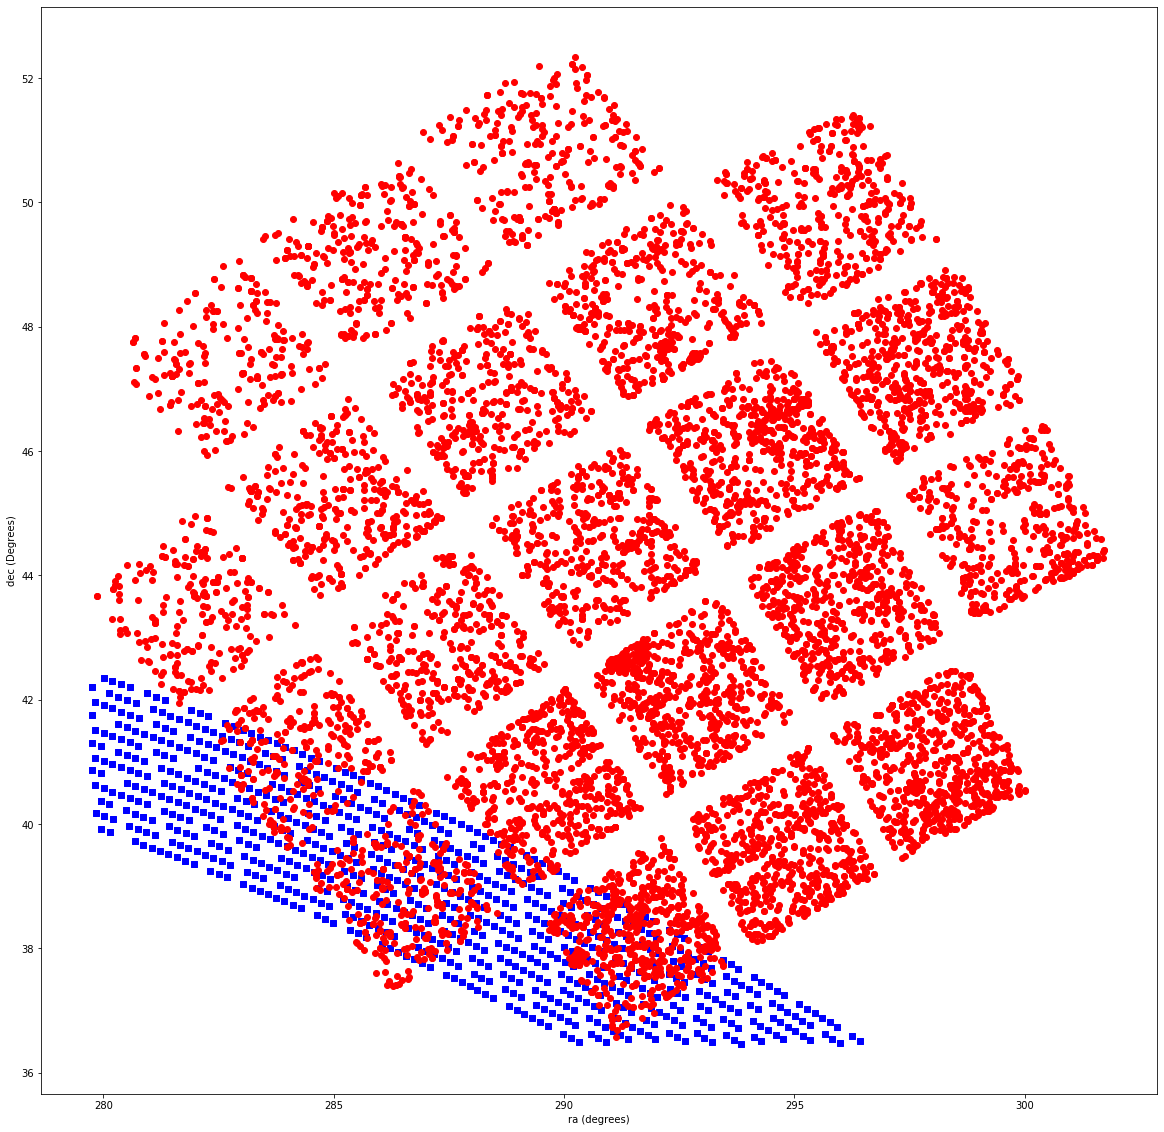

In [28]:
#This plot shows that unfortunatly there is not that much available data that has both a picture and an annotation
x = []
y = []

plt.figure(figsize=(20,20))
plt.ylabel('dec (Degrees)')
plt.xlabel('ra (degrees)')

#814; the relevant strand of pictures (there is a small strand on the right side with very little overlap)
plt.scatter(x[:814], y[:814], c='b', marker="s", label='first')
plt.scatter(ra, dec, c='r', marker="o", label='second')
plt.show()

In [81]:
#Save img_matrix before manipulating

copy_of_img_matrix = []56
img_matrix_csv = os.path.join(base_dir, 'img_matrix.csv')

with open(img_matrix_csv, 'a+') as file:
    for i in img_matrix:
        copy_of_img_matrix.append(i)
        file.write(str(i[0])+ ',' + str(i[1]) + ','  + str(i[2]) + '\n')

In [82]:
len(img_matrix)

898

In [76]:
#Ideally this would account for epoch changes, but...
cropped_image_dir = os.path.join(image_dir, 'cropped_images')
try:
    os.mkdir(cropped_image_dir)
except:
    print('cropped exists')

    
    
def zoom(pic_ra, pic_dec, abs_ra, abs_dec, image_path):
    #pixel (0, 0) = (pic_ra, pic_dec) 
    #Therefore, pixel (0 + (delta_ra * d_in_ra_h), 0 + (delta_dec * d_in_dec_w))
    #Zoom to 256 by 256
    img_size = 256
    delta_ra = abs_ra - pic_ra
    delta_dec = abs_dec - pic_dec
    
    pix_x = delta_dec*(d_in_w_dec)
    pix_y = delta_ra*(d_in_h_ra)
    
    print((pix_x, pix_y))
     
        
    new_path_base = os.path.join(cropped_image_dir, (str(abs_ra) + '-' + str(abs_dec)))
                                 
    new_path =  new_path_base + '.jpg'
    new_path_2 = new_path_base + '(2).jpg'
    new_path_3 = new_path_base + '(3).jpg'
                                                     
    
    image = img.open(image_path)
    
    #print((left, right, lower, upper))
    b_1 = (pix_x, pix_y, img_size + pix_x, img_size + pix_y)
    #print('box=' + str(b))
    out_image = image.crop(box=b_1) # left, upper, right, and lower
    out_image.save(new_path)
    
    
    #It is better to implement some shifting manually here because it gives new information (more of the background image)
    #Rather than just shifting the images during training, which does not give more info, but just presents it in a different way
    pix_shift_x = randint(-50, 50)
    pix_shift_y = randint(-50, 50)
    b_2 = (pix_x + pix_shift_x, pix_y + pix_shift_y, img_size + pix_shift_x + pix_x, pix_shift_y + img_size + pix_y)
    out_image_2 = image.crop(box=b_2)
    out_image_2.save(new_path_2)
                                                     
    pix_shift_x = randint(-50, 50)
    pix_shift_y = randint(-50, 50)
    b_2 = (pix_x + pix_shift_x, pix_y + pix_shift_y, img_size + pix_shift_x + pix_x, pix_shift_y + img_size + pix_y)
    out_image_3 = image.crop(box=b_2)
    out_image_3.save(new_path_3)
    


cropped exists


In [83]:
#The minimum and maximum ra ((min, max)) for each image
min_ra_max = []

for i in range(len(img_matrix)):
    min_ra_max.append((img_matrix[i][0], img_matrix[i][0]+1489*d_in_ra_h))



In [84]:
#The minimum and maximum dec ((min, max)) for each image
min_dec_max = []

for i in range(len(img_matrix)):
    min_dec_max.append((img_matrix[i][1], img_matrix[i][1]+2048*d_in_dec_w))
    
len(min_dec_max)

898

In [85]:
#Create a new column in exoplanet data pointing towards its picture as an index of img_matrix
exoplanet_data['image_num'] = np.zeros(len(exoplanet_data['ra']), dtype=int)

In [42]:
#Function to return if coords are in given image
def in_coords(ra_range, dec_range, ra, dec): #box: (min_ra, max_ra) (min_dec, max_dec), point: ra, dec
    return (ra_range[0] - ra <= 0) and (ra_range[1] - ra >= 0) and (dec_range[0] - dec <= 0) and (dec_range[1] - dec >= 0)

in_coords(min_ra_max[0], min_dec_max[0], 280, 41)

False

In [86]:
#Find matches for images and stars and update accordingly 
image_tracker = np.zeros(len(min_ra_max), dtype=int)

for i in range(len(min_ra_max)):
    for j in range(len(ra)):
        if in_coords(min_ra_max[i], min_dec_max[i], ra[j], dec[j]):
            print('match: ' + str(i) + ', ' + str(j))
            exoplanet_data['image_num'][j] = i
            image_tracker[i] = 1
         

match: 77, 5547


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


match: 88, 5547
match: 99, 4687
match: 100, 9082
match: 111, 4687
match: 155, 5718
match: 155, 7521
match: 165, 3393
match: 167, 7074
match: 167, 8282
match: 167, 8863
match: 174, 2120
match: 174, 5927
match: 175, 1527
match: 175, 1528
match: 175, 1529
match: 175, 9219
match: 175, 9239
match: 177, 3429
match: 177, 3431
match: 178, 6237
match: 178, 9283
match: 179, 2785
match: 179, 4627
match: 179, 5811
match: 179, 6237
match: 179, 8701
match: 186, 124
match: 186, 125
match: 187, 5927
match: 187, 8150
match: 188, 9239
match: 189, 1844
match: 189, 1845
match: 189, 1861
match: 190, 3429
match: 190, 3431
match: 190, 4749
match: 190, 4769
match: 191, 4749
match: 191, 4769
match: 191, 6264
match: 197, 123
match: 198, 124
match: 198, 125
match: 199, 4390
match: 199, 6995
match: 200, 3258
match: 200, 4706
match: 200, 8150
match: 201, 4706
match: 201, 5722
match: 201, 7108
match: 202, 1844
match: 202, 1845
match: 202, 1861
match: 202, 2823
match: 202, 2865
match: 202, 2913
match: 202, 4956
matc

match: 465, 7006
match: 466, 8392
match: 473, 4352
match: 473, 4413
match: 474, 2077
match: 474, 6975
match: 474, 6976
match: 474, 8140
match: 474, 9493
match: 475, 3990
match: 475, 4905
match: 475, 4909
match: 476, 905
match: 476, 4314
match: 485, 4352
match: 485, 4413
match: 486, 861
match: 486, 5358
match: 486, 5359
match: 492, 4860
match: 498, 5358
match: 498, 5359
match: 499, 861
match: 503, 4198
match: 503, 7295
match: 503, 8272
match: 504, 4198
match: 504, 7295
match: 504, 8272
match: 504, 8527
match: 509, 5006
match: 513, 2780
match: 513, 5947
match: 513, 7563
match: 514, 783
match: 514, 3321
match: 514, 7677
match: 515, 6087
match: 515, 7839
match: 525, 5397
match: 525, 5947
match: 525, 9055
match: 526, 807
match: 526, 827
match: 526, 828
match: 526, 1933
match: 526, 2049
match: 526, 3076
match: 526, 4111
match: 527, 1472
match: 527, 1578
match: 527, 1580
match: 527, 1581
match: 527, 3321
match: 527, 4582
match: 527, 7092
match: 536, 2124
match: 536, 4759
match: 538, 807
match

match: 690, 3553
match: 690, 4136
match: 691, 1881
match: 691, 1893
match: 691, 1959
match: 691, 7168
match: 691, 8536
match: 692, 429
match: 692, 5002
match: 692, 8656
match: 693, 1764
match: 695, 3848
match: 695, 8620
match: 695, 8945
match: 696, 3848
match: 697, 481
match: 697, 498
match: 697, 632
match: 697, 8960
match: 698, 80
match: 698, 592
match: 698, 3897
match: 698, 4136
match: 698, 5999
match: 698, 6916
match: 698, 7505
match: 698, 7506
match: 699, 2696
match: 699, 2697
match: 699, 2899
match: 699, 3531
match: 699, 5879
match: 699, 5891
match: 699, 6053
match: 700, 379
match: 700, 380
match: 700, 392
match: 700, 393
match: 700, 1630
match: 700, 3559
match: 700, 5305
match: 700, 5633
match: 701, 365
match: 701, 1630
match: 701, 5002
match: 701, 7321
match: 701, 8942
match: 702, 361
match: 702, 365
match: 702, 4607
match: 702, 6184
match: 702, 8079
match: 705, 3793
match: 705, 3812
match: 706, 481
match: 706, 498
match: 706, 3793
match: 706, 3812
match: 706, 3860
match: 706, 4

In [87]:
#Delete rows for images without a picture
drop_indices = []

for index, row in exoplanet_data.iterrows():
    if row['image_num'] == 0:
        drop_indices.append(index)

exoplanet_data = exoplanet_data.drop(drop_indices)

In [88]:
#Delete image data for images without a star in them
image_tracker = image_tracker.tolist()
print(len(img_matrix))

i = 0
while i < len(image_tracker):
    if image_tracker[i] == 0:
        print('Not a mathc')
        del image_tracker[i]
        del img_matrix[i]
        del min_ra_max[i]
        del min_dec_max[i]
    else:
        i = i+1
        
img_matrix

898
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc
Not a mathc


[(281.148025544,
  42.048031059,
  '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0137.jpg'),
 (281.148025544,
  42.048031059,
  '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0137.jpg'),
 (281.454499769,
  41.7405325275,
  '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0139.jpg'),
 (281.337007779,
  41.9961250364,
  '/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0138.jpg'),
 (281.642354243,
  41.6881347313,
  '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0140.jpg'),
 (282.449318205,
  41.2328035853,
  '/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0145.jpg'),
 (282.618854442,
  40.7335645683,
  '/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0147.jpg'),
 (282.577061113,
  41.4216822215,
  '/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0145.jpg'),
 (282.912649763,
  40.4223094328,
  '/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0149.jpg'),
 (282.802926

In [89]:
print(len(img_matrix))
print(len(image_tracker))

335
335


In [90]:
#Get actual images 
#Runtime: ~30 minutes on cc wifi
for i in range(len(img_matrix)):
    base_url = 'https://dr12.sdss.org'
    
    i_req = requests.get(base_url + img_matrix[i][2])
    print(i_req.url)

    
    with open(os.path.join(image_dir, (str(img_matrix[i][0]) + '-' + str(img_matrix[i][1]) + '.jpg')), 'wb+') as f:
        f.write(i_req.content)

https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0137.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0137.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0139.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5416/6/frame-irg-005416-6-0138.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0140.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0145.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0147.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0145.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0149.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0148.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0147.jpg

https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/2/frame-irg-005403-2-0165.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0165.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0164.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0163.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5416/5/frame-irg-005416-5-0161.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/1/frame-irg-005403-1-0167.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5416/1/frame-irg-005416-1-0167.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5416/2/frame-irg-005416-2-0165.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0165.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0164.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0161.jpg

https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0179.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0031.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0177.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5416/4/frame-irg-005416-4-0177.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0179.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0032.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0028.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/6177/3/frame-irg-006177-3-0033.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0179.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0176.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0029.jpg

https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0049.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0195.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0048.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/6/frame-irg-005403-6-0194.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/6177/6/frame-irg-006177-6-0046.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/3/frame-irg-005403-3-0199.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5416/3/frame-irg-005416-3-0198.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/4/frame-irg-005403-4-0197.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/6177/4/frame-irg-006177-4-0050.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/5403/5/frame-irg-005403-5-0196.jpg
https://dr12.sdss.org/sas/dr12/boss/photoObj/frames/301/6177/5/frame-irg-006177-5-0048.jpg

In [58]:
exoplanet_data

rowid    kepid kepoi_name    kepler_name koi_disposition  \
24       25  2306756  K00113.01            NaN  FALSE POSITIVE   
73       74  3342970  K00800.01   Kepler-234 b       CONFIRMED   
74       75  3342970  K00800.02   Kepler-234 c       CONFIRMED   
79       80  2440757  K00792.01            NaN  FALSE POSITIVE   
80       81  2445129  K00793.01            NaN  FALSE POSITIVE   
81       82  2713049  K00794.01   Kepler-683 b       CONFIRMED   
82       83  3114167  K00795.01   Kepler-684 b       CONFIRMED   
83       84  3114661  K00796.01            NaN  FALSE POSITIVE   
84       85  3115833  K00797.01            NaN       CANDIDATE   
85       86  4139816  K00812.02   Kepler-235 d       CONFIRMED   
86       87  4139816  K00812.03   Kepler-235 e       CONFIRMED   
88       89  4139816  K00812.04   Kepler-235 c       CONFIRMED   
94       95  3641726  K00804.01            NaN       CANDIDATE   
95       96  3734868  K00805.01            NaN  FALSE POSITIVE   
96       97  3832474  K00806.01    Kepler-30 d       CONFIRMED   
98       99  3832474  K00806.02    Kepler-30 c       CONFIRMED   
99      100  3832474  K00806.03    Kepler-30 b       CONFIRMED   
100     101  3836375  K00807.01            NaN  FALSE POSITIVE   
101     102  3838486  K00808.01            NaN  FALSE POSITIVE   
102     103  3935914  K00809.01   Kepler-686 b       CONFIRMED   
103     104  3940418  K00810.01            NaN       CANDIDATE   
104     105  4049131  K00811.01   Kepler-687 b       CONFIRMED   
105     106  4139816  K00812.01   Kepler-235 b       CONFIRMED   
112     113  4544670  K00815.01            NaN       CANDIDATE   
114     115  4725681  K00817.01   Kepler-236 c       CONFIRMED   
123     124  5164255  K00824.01   Kepler-693 b       CONFIRMED   
124     125  5252423  K00825.01   Kepler-237 c       CONFIRMED   
125     126  5252423  K00825.02   Kepler-237 b       CONFIRMED   
157     158  6022556  K00844.01   Kepler-697 b       CONFIRMED   
162     163  3531558  K00118.01   Kepler-467 b       CONFIRMED   
...     ...      ...        ...            ...             ...   
8985   8986  2984990  K07641.01            NaN       CANDIDATE   
8986   8987  3230095  K07647.01            NaN  FALSE POSITIVE   
8987   8988  3235282  K07649.01            NaN  FALSE POSITIVE   
9009   9010  5858919  K08109.01            NaN       CANDIDATE   
9016   9017  4908495  K06468.01            NaN  FALSE POSITIVE   
9018   9019  5083252  K06512.01            NaN  FALSE POSITIVE   
9023   9024  3644631  K07659.01            NaN  FALSE POSITIVE   
9024   9025  3644738  K07660.01            NaN  FALSE POSITIVE   
9025   9026  3848083  K07670.01            NaN       CANDIDATE   
9028   9029  2860114  K02170.01            NaN  FALSE POSITIVE   
9050   9051  5513833  K06591.01            NaN  FALSE POSITIVE   
9055   9056  4252671  K07687.01            NaN       CANDIDATE   
9059   9060  3234598  K02413.01   Kepler-383 b       CONFIRMED   
9082   9083  6664842  K06750.01            NaN       CANDIDATE   
9136   9137  2985587  K02807.01            NaN       CANDIDATE   
9151   9152  3629119  K08242.01            NaN       CANDIDATE   
9153   9154  3734501  K08244.01            NaN  FALSE POSITIVE   
9219   9220  5511081  K01930.03   Kepler-338 d       CONFIRMED   
9239   9240  5683219  K08257.01            NaN       CANDIDATE   
9259   9260  4645492  K08095.01            NaN  FALSE POSITIVE   
9283   9284  6182508  K08261.01            NaN  FALSE POSITIVE   
9476   9477  4446859  K08246.01            NaN       CANDIDATE   
9489   9490  2010152  K08084.01            NaN  FALSE POSITIVE   
9491   9492  2712825  K08086.01            NaN  FALSE POSITIVE   
9492   9493  3443582  K08087.01            NaN  FALSE POSITIVE   
9493   9494  3533483  K08088.01            NaN  FALSE POSITIVE   
9502   9503  2438406  K04941.01            NaN  FALSE POSITIVE   
9540   9541  3645438  K04385.02  Kepler-1600 b       CONFIRMED   
9542   9543  4548098  K04157.02            NaN

In [110]:
#Setup file hierarchy for training
import shutil

train_dir = os.path.join(cropped_image_dir, 'train')
train_dir_confirmed = os.path.join(train_dir, 'confirmed')
train_dir_false = os.path.join(train_dir, 'false')

test_dir = os.path.join(cropped_image_dir, 'test')
test_dir_confirmed = os.path.join(test_dir, 'confirmed')
test_dir_false = os.path.join(test_dir, 'false')


try:
    os.mkdir(train_dir)
    os.mkdir(train_dir_confirmed)
    os.mkdir(train_dir_false)
except:
    print('failed or train_dir already exists')

try:
    os.mkdir(test_dir)
    os.mkdir(test_dir_confirmed)
    os.mkdir(test_dir_false)
except:
    print('failed or test_dir already exists')



In [109]:
#Use to delete file hierarchy
for file in os.listdir(cropped_image_dir):
    try:
        os.remove(os.path.join(cropped_image_dir, file))
    except PermissionError:
        shutil.rmtree(os.path.join(cropped_image_dir, file), ignore_errors=True)

In [93]:
#Redo image_num because indices have change in img_matrix

for i in range(len(min_ra_max)):
    for j in range(len(ra)):
        if in_coords(min_ra_max[i], min_dec_max[i], ra[j], dec[j]):
            print('match: ' + str(i) + ', ' + str(j))
            exoplanet_data['image_num'][j] = i

match: 0, 5547


c:\users\ccesports11\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


match: 1, 5547
match: 2, 4687
match: 3, 9082
match: 4, 4687
match: 5, 5718
match: 5, 7521
match: 6, 3393
match: 7, 7074
match: 7, 8282
match: 7, 8863
match: 8, 2120
match: 8, 5927
match: 9, 1527
match: 9, 1528
match: 9, 1529
match: 9, 9219
match: 9, 9239
match: 10, 3429
match: 10, 3431
match: 11, 6237
match: 11, 9283
match: 12, 2785
match: 12, 4627
match: 12, 5811
match: 12, 6237
match: 12, 8701
match: 13, 124
match: 13, 125
match: 14, 5927
match: 14, 8150
match: 15, 9239
match: 16, 1844
match: 16, 1845
match: 16, 1861
match: 17, 3429
match: 17, 3431
match: 17, 4749
match: 17, 4769
match: 18, 4749
match: 18, 4769
match: 18, 6264
match: 19, 123
match: 20, 124
match: 20, 125
match: 21, 4390
match: 21, 6995
match: 22, 3258
match: 22, 4706
match: 22, 8150
match: 23, 4706
match: 23, 5722
match: 23, 7108
match: 24, 1844
match: 24, 1845
match: 24, 1861
match: 24, 2823
match: 24, 2865
match: 24, 2913
match: 24, 4956
match: 25, 2024
match: 25, 2230
match: 26, 1330
match: 26, 8022
match: 27, 148

match: 185, 4314
match: 186, 4352
match: 186, 4413
match: 187, 861
match: 187, 5358
match: 187, 5359
match: 188, 4860
match: 189, 5358
match: 189, 5359
match: 190, 861
match: 191, 4198
match: 191, 7295
match: 191, 8272
match: 192, 4198
match: 192, 7295
match: 192, 8272
match: 192, 8527
match: 193, 5006
match: 194, 2780
match: 194, 5947
match: 194, 7563
match: 195, 783
match: 195, 3321
match: 195, 7677
match: 196, 6087
match: 196, 7839
match: 197, 5397
match: 197, 5947
match: 197, 9055
match: 198, 807
match: 198, 827
match: 198, 828
match: 198, 1933
match: 198, 2049
match: 198, 3076
match: 198, 4111
match: 199, 1472
match: 199, 1578
match: 199, 1580
match: 199, 1581
match: 199, 3321
match: 199, 4582
match: 199, 7092
match: 200, 2124
match: 200, 4759
match: 201, 807
match: 201, 827
match: 201, 828
match: 201, 8660
match: 202, 4762
match: 202, 4763
match: 202, 8814
match: 202, 8874
match: 202, 9259
match: 203, 4372
match: 204, 5119
match: 204, 5978
match: 204, 8452
match: 205, 7678
match:

match: 296, 3848
match: 297, 481
match: 297, 498
match: 297, 632
match: 297, 8960
match: 298, 80
match: 298, 592
match: 298, 3897
match: 298, 4136
match: 298, 5999
match: 298, 6916
match: 298, 7505
match: 298, 7506
match: 299, 2696
match: 299, 2697
match: 299, 2899
match: 299, 3531
match: 299, 5879
match: 299, 5891
match: 299, 6053
match: 300, 379
match: 300, 380
match: 300, 392
match: 300, 393
match: 300, 1630
match: 300, 3559
match: 300, 5305
match: 300, 5633
match: 301, 365
match: 301, 1630
match: 301, 5002
match: 301, 7321
match: 301, 8942
match: 302, 361
match: 302, 365
match: 302, 4607
match: 302, 6184
match: 302, 8079
match: 303, 3793
match: 303, 3812
match: 304, 481
match: 304, 498
match: 304, 3793
match: 304, 3812
match: 304, 3860
match: 304, 4953
match: 305, 632
match: 305, 2211
match: 305, 3897
match: 305, 5118
match: 305, 5999
match: 305, 6000
match: 305, 7250
match: 305, 7303
match: 305, 7557
match: 305, 8659
match: 306, 2696
match: 306, 2697
match: 306, 2899
match: 306, 3

In [111]:
#Use the first 3/4 of the images for training and the rest for validation/testing
train_index = int(0.75 * len(exoplanet_data))
train_index

672

In [112]:
#Crop images
i = 0

for index, row in exoplanet_data.iterrows():
    target = exoplanet_data['image_num'][index] #target picture
    abs_ra = exoplanet_data['ra'][index] #ra of star
    abs_dec = exoplanet_data['dec'][index] #dec of star
    img_ra = img_matrix[target][0] #ra of image
    img_dec = img_matrix[target][1] #dec of image
    
    zoom(img_ra, 
         img_dec, 
         abs_ra, 
         abs_dec, 
         os.path.join(image_dir, str(img_matrix[target][0]) + '-' + str(img_matrix[target][1]) + '.jpg'))
    
    #copy files to labeled folders
    file_name = str(abs_ra) + '-' + str(abs_dec) + '.jpg'
    file_2_name = str(abs_ra) + '-' + str(abs_dec) + '(2).jpg'
    file_3_name = str(abs_ra) + '-' + str(abs_dec) + '(3).jpg'
                   
    
    
    if (exoplanet_data['koi_disposition'][index] == 'CONFIRMED') or (exoplanet_data['koi_disposition'][index] == 'CANDIDATE'):
        if i <= train_index:
            shutil.copyfile(os.path.join(cropped_image_dir, file_name), os.path.join(train_dir_confirmed, file_name))
            shutil.copyfile(os.path.join(cropped_image_dir, file_2_name), os.path.join(train_dir_confirmed, file_2_name))
            shutil.copyfile(os.path.join(cropped_image_dir, file_3_name), os.path.join(train_dir_confirmed, file_3_name))
        #if False Positive
        else:
            shutil.copyfile(os.path.join(cropped_image_dir, file_name), os.path.join(test_dir_confirmed, file_name))
            shutil.copyfile(os.path.join(cropped_image_dir, file_2_name), os.path.join(test_dir_confirmed, file_2_name))
            shutil.copyfile(os.path.join(cropped_image_dir, file_3_name), os.path.join(test_dir_confirmed, file_3_name))
            
    
    else:
        if i <= train_index:
            shutil.copyfile(os.path.join(cropped_image_dir, file_name), os.path.join(train_dir_false, file_name))
            shutil.copyfile(os.path.join(cropped_image_dir, file_2_name), os.path.join(train_dir_false, file_2_name))
            shutil.copyfile(os.path.join(cropped_image_dir, file_3_name), os.path.join(train_dir_false, file_3_name))
        else:
            shutil.copyfile(os.path.join(cropped_image_dir, file_name), os.path.join(test_dir_false, file_name))
            shutil.copyfile(os.path.join(cropped_image_dir, file_2_name), os.path.join(test_dir_false, file_2_name))
            shutil.copyfile(os.path.join(cropped_image_dir, file_3_name), os.path.join(test_dir_false, file_3_name))
    i = i + 1

(595.5735058833347, 35.33142316180661)
(907.8445966295312, 1195.965661751256)
(907.8445966295312, 1195.965661751256)
(1638.8010109688162, 1025.6639121699752)
(1221.2168804844682, 451.0438296139792)
(1143.6884565289067, 1188.7154686833774)
(559.459221355188, 953.0131449353104)
(1147.5191827113822, 618.3523838301894)
(1831.2413130886086, 200.3187321642154)
(518.2783333112648, 395.4877120008949)
(518.2783333112648, 395.4877120008949)
(518.2783333112648, 395.4877120008949)
(508.3071070374074, 1368.9689838566376)
(1673.5070808625082, 635.5383697871024)
(1117.6105271236775, 606.6373437191427)
(1117.6105271236775, 606.6373437191427)
(1117.6105271236775, 606.6373437191427)
(86.82928902935176, 111.99437919445492)
(620.6593118450221, 5.891378858998753)
(1724.149735521677, 78.60034209436797)
(1138.728608451501, 1379.5251937517403)
(1269.9572761730926, 217.8199899410616)
(518.2783333112648, 395.4877120008949)
(844.5778833628026, 872.5478157806048)
(1492.4865424077636, 494.3468569230158)
(1766.1664

(1022.037981455498, 658.5732919836975)
(1813.5447852319783, 429.3516732949285)
(1806.690510254017, 355.7580174155543)
(731.2435183879151, 1218.8414392525312)
(968.4600960086893, 784.294099671852)
(242.60976695492317, 355.4612215964772)
(421.47989173685386, 42.55383794457047)
(630.765155034046, 251.5824580158123)
(48.233500586781574, 124.2798535496584)
(978.6186430684342, 1027.288333075084)
(1347.195881779283, 1056.5220103530346)
(838.7531882714084, 48.60110191750596)
(1775.6001839387109, 1049.6558730718261)
(1473.7551974026812, 455.08096063502353)
(916.0447904300221, 1185.8882094376515)
(327.39961932333256, 476.1671373961775)
(517.4254363296623, 958.9013247158103)
(1254.4075530053278, 689.9040445420652)
(921.8653947849513, 1216.4574300874692)
(1104.6911724067782, 1299.4747767428398)
(102.19357758175272, 1158.6371893391783)
(1312.9817499726037, 1161.680027139694)
(1874.7837706158246, 1408.549191484609)
(1525.2481875118167, 438.8953937939481)
(1734.690313041268, 268.13970028570884)
(1361

(1698.4628295410193, 210.08742425746956)
(1083.8751498734705, 865.3995091990363)
(307.4139603106669, 171.82522179134406)
(942.7222361968825, 1232.9061078900459)
(80.64706630090018, 430.9413959219463)
(136.85994638355407, 939.8327454233313)
(1199.1061863978332, 525.7791027006665)
(231.34284360749572, 428.500158798887)
(716.8831346603188, 299.7577043682183)
(431.6280459515397, 1031.1585221198816)
(1158.1883026787982, 612.7275948356325)
(1327.0575291679424, 906.0964674400802)
(516.1672388073902, 590.2144400514895)
(1125.6166767796244, 358.1832591465494)
(48.33050526452269, 720.38835726585)
(584.4107008144135, 475.05316234270475)
(1454.3566524618354, 911.3102240228426)
(1116.068204552667, 129.63723589427667)
(1369.021330761664, 756.7812845455236)
(1180.2239757307673, 916.8660172922876)
(1137.7979685716848, 1255.0329758517269)
(267.4606856923218, 587.8783716852423)
(667.0266705266739, 437.20503254776895)
(1471.527028731066, 97.0381508609501)
(1117.6105271236775, 606.6373437191427)
(1641.097

(830.2008107315518, 1162.589419996513)
(307.15841369540755, 1192.8383395431767)
(1637.6603232333955, 390.8253691371956)
(1724.7399685057171, 361.02511465955024)
(202.2721801700219, 664.0334759176317)
(1237.7718387793554, 204.24881884677765)
(1850.3673638616567, 464.1711531636606)
(1644.8947334252787, 777.4768258539274)
(721.8535843170457, 1266.2654013359534)
(1542.1831827038152, 540.9344074881441)
(673.5206165941021, 1419.2457221840964)
(312.1656043511773, 637.8080062281729)
(1889.5679142470078, 353.1923716898913)
(1276.0592708563279, 153.78831880232835)
(1421.3738640699673, 86.86967985151018)
(1468.4322493928162, 225.48882363111605)
(385.5930957133888, 780.722740847335)
(1685.733655117262, 546.3671080869116)
(382.8607908614306, 558.2003325894638)
(1276.963775854096, 822.0386186542984)
(1669.3869061531327, 178.48733652607245)
(1770.8870846329744, 394.5217264650722)
(235.3390740716356, 1138.7410243544937)
(1372.588358351203, 554.9214360818213)
(478.96795395221653, 1052.9373485061994)
(8

(328.26478775771096, 1162.6987861246832)
(1979.7448739192032, 515.9253589877819)
(232.57973587299173, 619.8374217221785)
(1609.7349790102385, 920.718653001988)
(1571.0425148730162, 437.1571446886554)
(169.92367372694764, 160.42068891551583)
(416.49504622752704, 406.5685934374302)
(698.9363382895888, 698.8298967090155)
(1483.4298502046902, 938.6703758019922)
(1320.8697227997443, 1186.0137524656786)
(617.9849995528848, 1125.4476512428823)
(1445.946338202591, 819.066538719269)
(384.1242551406253, 306.132302880299)
(1162.8782332456015, 824.3432483242675)
(738.8644226237143, 1080.3422798194301)
(1394.451008152913, 733.1527555848382)
(580.4465715513705, 498.59816737578046)
(1777.5236135477267, 984.5432083951447)
(628.4914316377259, 1135.0494316113318)
(905.4775554365376, 129.30245952789636)
(1283.8778607407903, 232.8583128276644)
(1663.7523006009842, 509.6227737715193)
(1035.1508047853945, 69.41930481536482)
(1409.7028328405888, 355.29559555344645)
(409.4980636155267, 1164.6042343419756)
(26

In [113]:
print('Pictures in train-confirmed: ' + str(len(os.listdir(train_dir_confirmed))))
print('Pictures in train-false: ' + str(len(os.listdir(train_dir_false))))

print('pictures in test-confirmed: ' + str(len(os.listdir(test_dir_confirmed))))
print('pictures in test-false": ' + str(len(os.listdir(test_dir_false))))

Pictures in train-confirmed: 810
Pictures in train-false: 975
pictures in test-confirmed: 150
pictures in test-false": 492


In [128]:
#Define structure of neural network with keras
#This is the second neural network; the first one worked better, and did not have dropout and had one less convolution layer
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 254, 254, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 60, 60, 64)        36928     
__________

In [129]:
#Compile the model using binary_crossentropy
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [130]:
#Create datagens for training and testing (validation) 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=50,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rescale=1./255)
test_datagen = ImageDataGenerator(rotation_range=50,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(256, 256), 
                                                    batch_size=20, 
                                                    class_mode='binary')
test_generator = train_datagen.flow_from_directory(test_dir, 
                                                   target_size=(256, 256), 
                                                   batch_size=20, 
                                                   class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('Data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break
    



Found 1785 images belonging to 2 classes.
Found 642 images belonging to 2 classes.
Data batch shape:  (20, 256, 256, 3)
labels batch shape:  (20,)


In [131]:
#Train: runtime 1 hour - 2 hours depending on model
#Run on cc esports lab computer which the nerdy guys said had built in GPU support
#Nerdy guys actually knew what they were doing also so they were probably right
history = model.fit_generator(train_generator, 
                              steps_per_epoch=90, 
                              epochs=30, 
                              validation_data=test_generator, 
                              validation_steps=32)
model.save(os.path.join(base_dir, 'exoplanets_system_classification.h5'))

Epoch 1/30
90/90 [==============================] - 177s 2s/step - loss: 0.6928 - acc: 0.5384 - val_loss: 0.6818 - val_acc: 0.7438
Epoch 2/30
90/90 [==============================] - 174s 2s/step - loss: 0.6840 - acc: 0.5383 - val_loss: 0.6903 - val_acc: 0.4630
Epoch 3/30
90/90 [==============================] - 175s 2s/step - loss: 0.6806 - acc: 0.5556 - val_loss: 0.7073 - val_acc: 0.2653
Epoch 4/30
90/90 [==============================] - 174s 2s/step - loss: 0.6748 - acc: 0.5828 - val_loss: 0.6681 - val_acc: 0.5691
Epoch 5/30
90/90 [==============================] - 174s 2s/step - loss: 0.6762 - acc: 0.5617 - val_loss: 0.6760 - val_acc: 0.5418
Epoch 6/30
90/90 [==============================] - 174s 2s/step - loss: 0.6748 - acc: 0.5645 - val_loss: 0.6920 - val_acc: 0.4695
Epoch 7/30
90/90 [==============================] - 174s 2s/step - loss: 0.6741 - acc: 0.5561 - val_loss: 0.6899 - val_acc: 0.5000
Epoch 8/30
90/90 [==============================] - 174s 2s/step - loss: 0.6731 - a

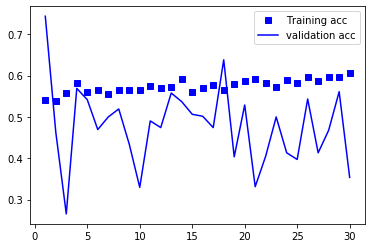

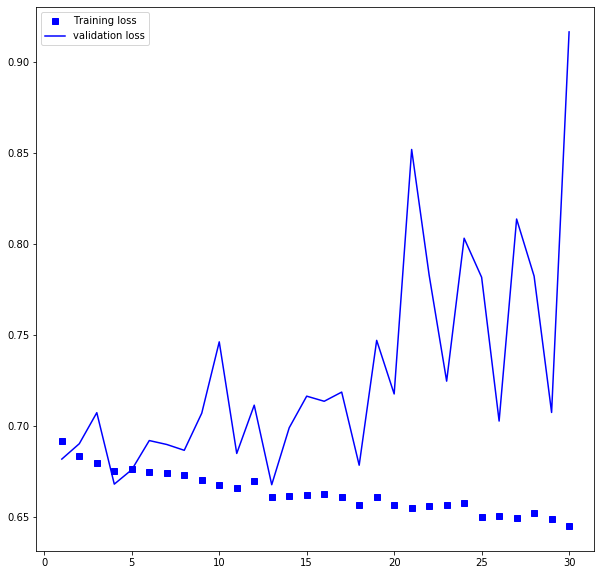

In [132]:
#Plot the results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', marker='s', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.legend()

plt.figure(figsize=(10,10))

plt.plot(epochs, loss, 'bo', marker='s', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.legend()

plt.show()

In [ ]:
#From here, if the model was any good it could be used to make predictions